In [1]:
import pandas as pd  # 数据分析库
from snownlp import SnowNLP  # 中文情感分析库
from wordcloud import WordCloud  # 绘制词云图
from pprint import pprint  # 美观打印
import jieba.analyse  # jieba分词
from PIL import Image  # 读取图片
import numpy as np  # 将图片的像素点转换成矩阵数据
import matplotlib.pyplot as plt  # 画图

In [2]:
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

In [3]:
# 情感分析打标
def sentiment_analyse(v_cmt_list):
    """
    情感分析打分
    :param v_cmt_list: 需要处理的评论列表
    :return:
    """
    score_list = []  # 情感评分值
    tag_list = []  # 打标分类结果
    pos_count = 0  # 计数器-积极
    neg_count = 0  # 计数器-消极
    mid_count = 0  # 计数器-中性
    for comment in v_cmt_list:
        tag = ''
        sentiments_score = SnowNLP(comment).sentiments
        if sentiments_score < 0.5:
            tag = '消极'
            neg_count += 1
        elif sentiments_score > 0.5:
            tag = '积极'
            pos_count += 1
        else:
            tag = '中性'
            mid_count += 1
        score_list.append(sentiments_score)  # 得分值
        tag_list.append(tag)  # 判定结果
    df['情感得分'] = score_list
    df['分析结果'] = tag_list
    grp = df['分析结果'].value_counts()
    print('正负面评论统计：')
    print(grp)
    grp.plot.pie(y='分析结果', autopct='%.2f%%')  # 画饼图
    plt.title('刘畊宏弹幕_情感分布占比图')
    plt.savefig('刘畊宏弹幕_情感分布占比图.png')  # 保存图片
    # 把情感分析结果保存到excel文件
    df.to_excel('刘畊宏弹幕_情感评分结果.xlsx', index=None)
    print('情感分析结果已生成：刘畊宏_情感评分结果.xlsx')

In [4]:
def make_wordcloud(v_str, v_stopwords, v_outfile):
    """
    绘制词云图
    :param v_str: 输入字符串
    :param v_stopwords: 停用词
    :param v_outfile: 输出文件
    :return: None
    """
    print('开始生成词云图：{}'.format(v_outfile))
    try:
        stopwords = v_stopwords  # 停用词
        backgroud_Image = np.array(Image.open('刘畊宏_背景图.png'))  # 读取背景图片
        wc = WordCloud(
            background_color="white",  # 背景颜色
            width=1500,  # 图宽
            height=1200,  # 图高
            max_words=1000,  # 最多字数
            # 字体文件路径，根据实际情况(Mac)替换
            # font_path='/System/Library/Fonts/SimHei.ttf',
            font_path="C:\Windows\Fonts\simhei.ttf",  # 字体文件路径，根据实际情况(Windows)替换
            stopwords=stopwords,  # 停用词
            mask=backgroud_Image,  # 背景图片
        )
        jieba_text = " ".join(jieba.lcut(v_str))  # jieba分词
        wc.generate_from_text(jieba_text)  # 生成词云图
        wc.to_file(v_outfile)  # 保存图片文件
        print('词云文件保存成功：{}'.format(v_outfile))
    except Exception as e:
        print('make_wordcloud except: {}'.format(str(e)))

In [5]:
df = pd.read_csv('刘畊宏弹幕.csv')  # 读取excel

In [6]:
v_cmt_list = df['弹幕内容'].values.tolist()  # 评论内容列表
print('length of v_cmt_list is:{}'.format(len(v_cmt_list)))

length of v_cmt_list is:10933


In [7]:
v_cmt_list = [str(i) for i in v_cmt_list]  # 数据清洗-list所有元素转换成字符串

In [8]:
v_cmt_str = ' '.join(str(i) for i in v_cmt_list)  # 评论内容转换为字符串

正负面评论统计：
积极    6196
消极    3576
中性    1161
Name: 分析结果, dtype: int64
情感分析结果已生成：刘畊宏_情感评分结果.xlsx


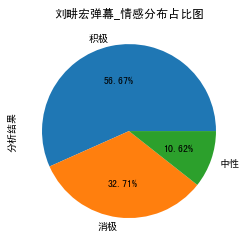

In [9]:
# 1、情感分析打分
sentiment_analyse(v_cmt_list=v_cmt_list)

In [10]:
# 2、用jieba统计弹幕中的top10高频词
keywords_top10 = jieba.analyse.extract_tags(
    v_cmt_str, withWeight=True, topK=10)
print('top10关键词及权重：')
pprint(keywords_top10)
with open('TOP10高频词.txt', 'w') as f:
    f.write(str(keywords_top10))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/q_/9pwlv2sd7mv6l5833nzv271w0000gn/T/jieba.cache
Loading model cost 0.654 seconds.
Prefix dict has been built successfully.


top10关键词及权重：
[('弹幕', 0.6353359990663874),
 ('打卡', 0.5694493248894468),
 ('哈哈哈', 0.4769378131814947),
 ('哈哈哈哈', 0.20281786368987736),
 ('哈哈', 0.1373231156504866),
 ('暖身', 0.1339878508342562),
 ('加油', 0.11971909368787938),
 ('第一天', 0.09167849490289962),
 ('666', 0.08622980499234312),
 ('好家伙', 0.08349642417203573)]


In [11]:
# 3、画词云图
make_wordcloud(v_str=v_cmt_str,
               # 停用词
               v_stopwords=['这个', '吗', '的', '啊', '她', '是', '了', '你', '我', '都', '也', '不', '在', '吧', '说', '就是', '这',
                            '有', '就', '或', '哇', '哦', '这样', '真的'],
               # 词云图文件名
               v_outfile='刘畊宏弹幕_词云图.jpg'
               )

开始生成词云图：刘畊宏弹幕_词云图.jpg
词云文件保存成功：刘畊宏弹幕_词云图.jpg
